### ✅ Step 1: Load and Explore the Dataset

In [1]:
import pandas as pd

Dataset link -> https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

In [2]:
fake_df = pd.read_csv("Data/Fake.csv")
real_df = pd.read_csv("Data/True.csv")

In [3]:
real_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake_df["label"] = 0
real_df["label"] = 1

In [5]:
real_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [6]:
data = pd.concat([fake_df, real_df], ignore_index=True)

In [7]:
data.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
data = data.sample(frac=1, random_state=7).reset_index(drop=True)

In [9]:
data["text"] = data["title"].fillna('') + " " + data["text"].fillna('')

In [10]:
data = data.drop(columns=["subject", "date", "title"])

In [11]:
print("Dataset shape:", data.shape)
print("Class distribution:\n", data["label"].value_counts())
data.head()

Dataset shape: (44898, 2)
Class distribution:
 label
0    23481
1    21417
Name: count, dtype: int64


,text,label
0,Senate backs massive increase in military spen...,1
1,"Anonymous GOP Reps Admit Clinton Will Win, Bl...",0
2,‘A Gimmick’: It Just Dawned On Republicans Th...,0
3,USA's Tillerson and Saudi crown prince discuss...,1
4,U.S. Senate confirms Acosta to head Labor Depa...,1


### ✅ Step 2: NLTK Preprocessing Code

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [15]:
def preprocess(text):
    text = text.lower()                            # Lowercase
    text = re.sub(r'<.*?>', '', text)              # Remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)           # Remove numbers and punctuation
    words = [stemmer.stem(word) for word in text.split() if word not in stop_words]
    return " ".join(words)

In [16]:
data["clean_text"] = data["text"].apply(preprocess)

In [17]:
data[["text", "clean_text"]].head()

,text,clean_text
0,Senate backs massive increase in military spen...,senat back massiv increas militari spend washi...
1,"Anonymous GOP Reps Admit Clinton Will Win, Bl...",anonym gop rep admit clinton win blame trump s...
2,‘A Gimmick’: It Just Dawned On Republicans Th...,gimmick dawn republican trump full sht wall ca...
3,USA's Tillerson and Saudi crown prince discuss...,usa tillerson saudi crown princ discuss terror...
4,U.S. Senate confirms Acosta to head Labor Depa...,us senat confirm acosta head labor depart wash...


### ✅ Step 3: TF-IDF Vectorization

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

In [20]:
X = vectorizer.fit_transform(data["clean_text"])
y = data["label"]

In [21]:
print("TF-IDF matrix shape:", X.shape)

TF-IDF matrix shape: (44898, 5000)


### ✅ Step 4: Train Multiple Models for Fake News Detection

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

##### ✅ Train Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

##### ✅ Train SVM (Linear)

In [26]:
from sklearn.svm import LinearSVC

In [27]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

##### ✅ Train Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

### ✅ Step 5: Model Evaluation

In [30]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
def evaluate_model(name, y_true, y_pred):
    print(f"🔍 {name} Results:")
    print("-" * 40)
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print("\n")

🔍 Logistic Regression Results:
----------------------------------------
Accuracy: 0.9893095768374165
F1 Score: 0.9888837424733673

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4673
           1       0.99      0.99      0.99      4307

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



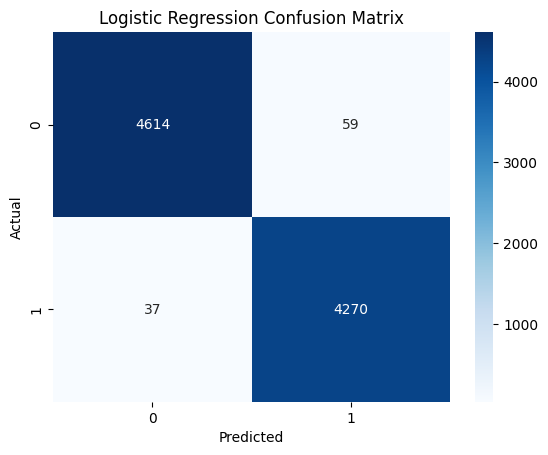



🔍 SVM Results:
----------------------------------------
Accuracy: 0.9952115812917595
F1 Score: 0.9950075467316847

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4673
           1       1.00      0.99      1.00      4307

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



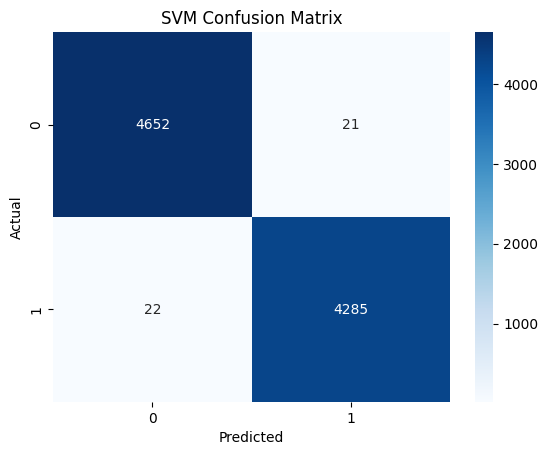



🔍 Random Forest Results:
----------------------------------------
Accuracy: 0.9967706013363029
F1 Score: 0.9966337782936738

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4673
           1       1.00      1.00      1.00      4307

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



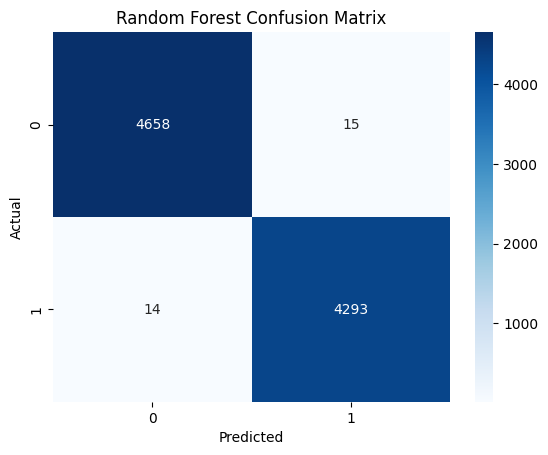

In [32]:
evaluate_model("Logistic Regression", y_test, lr_preds)
evaluate_model("SVM", y_test, svm_preds)
evaluate_model("Random Forest", y_test, rf_preds)

### ✅ Step 6.1: Download & Load GloVe Embeddings

In [33]:
import numpy as np

In [34]:
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf8') as f:
        for line in f:
            parts = line.split()
            word = parts[0]
            vector = np.array(parts[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

In [35]:
glove_path = "Data\glove.6B.100d.txt"
glove_embeddings = load_glove_embeddings(glove_path)
print("✅ GloVe Embeddings Loaded. Total words:", len(glove_embeddings))

<>:1: SyntaxWarning: invalid escape sequence '\g'
<>:1: SyntaxWarning: invalid escape sequence '\g'
C:\Users\moham\AppData\Local\Temp\ipykernel_12952\304861031.py:1: SyntaxWarning: invalid escape sequence '\g'
  glove_path = "Data\glove.6B.100d.txt"


✅ GloVe Embeddings Loaded. Total words: 400000


### ✅ Step 6.2: Convert News Text to GloVe Embeddings

In [36]:
def text_to_glove_vector(text, embeddings, dim=100):
    words = text.split()
    vectors = [embeddings[word] for word in words if word in embeddings]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(dim)

In [42]:
X_clean = data["clean_text"]
y_glove = data["label"]

In [43]:
X_train_GloVe, X_test_GloVe, y_train_glove, y_test_glove = train_test_split(
    X_clean, y_glove, test_size=0.2, random_state=7, stratify=y_glove
)

In [45]:
X_train_glove = np.array([text_to_glove_vector(text, glove_embeddings) for text in X_train_GloVe])
X_test_glove = np.array([text_to_glove_vector(text, glove_embeddings) for text in X_test_GloVe])

### ✅ Step 6.3: Train a model using GloVe embeddings

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [47]:
clf_glove = LogisticRegression(max_iter=1000, random_state=7)

In [48]:
clf_glove.fit(X_train_glove, y_train_glove)

LogisticRegression(max_iter=1000, random_state=7)

In [49]:
y_pred_glove = clf_glove.predict(X_test_glove)

In [50]:
print("✅ GloVe Logistic Regression Accuracy:", accuracy_score(y_test_glove, y_pred_glove))
print("\n✅ GloVe Logistic Regression Classification Report:\n")
print(classification_report(y_test_glove, y_pred_glove))

✅ GloVe Logistic Regression Accuracy: 0.9342984409799554

✅ GloVe Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      4696
           1       0.93      0.94      0.93      4284

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



### ✅ Step 7: Visualizations

##### 📊 1. Class Distribution Plot (Real vs Fake)

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
label_names = {0: "Fake", 1: "Real"}
data["label_name"] = data["label"].map(label_names)

C:\Users\moham\AppData\Local\Temp\ipykernel_12952\1546412450.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="label_name", palette="pastel")


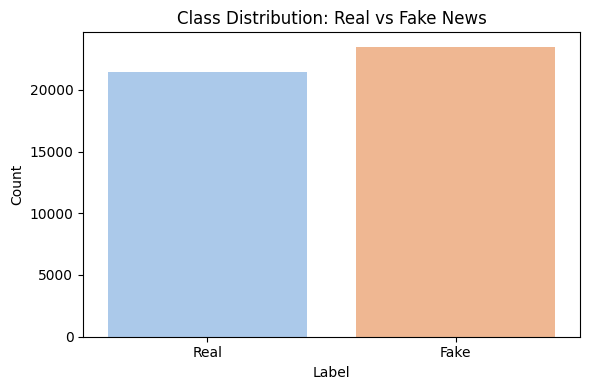

In [53]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="label_name", palette="pastel")
plt.title("Class Distribution: Real vs Fake News")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()